<a href="https://colab.research.google.com/github/bismillahkhanhn/AirQuality-Prediction-System/blob/main/Air.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Data Loaded Successfully!
                                            City  AQI  PM2.5  PM10    O3  \
0                    Gulzarpet, Anantapur, India   88   88.0  71.0  26.3   
1  Anand Kala Kshetram, Rajamahendravaram, India   58   58.0  45.0  14.6   
2                Tirumala-APPCB, Tirupati, India  110  110.0  53.0  15.0   
3                 PWD Grounds, Vijayawada, India    -   52.0   NaN   5.1   
4                  Naharlagun, Naharlagun, India   53   53.0  18.0   1.0   

    NO2  SO2   CO   Latitude  Longitude                 Time  
0   4.6  2.4  6.5  14.675886  77.593027  2024-05-04 18:00:00  
1  12.0  6.9  6.7  16.987287  81.736318  2024-05-04 18:00:00  
2  13.8  1.8  9.0  13.670000  79.350000  2024-05-04 18:00:00  
3   0.7  4.9  4.2  16.507014  80.627767  2020-11-19 16:00:00  
4   1.1  1.6  2.4  27.103358  93.679645  2024-05-04 09:00:00  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 11 columns):
 #   Column     Non-

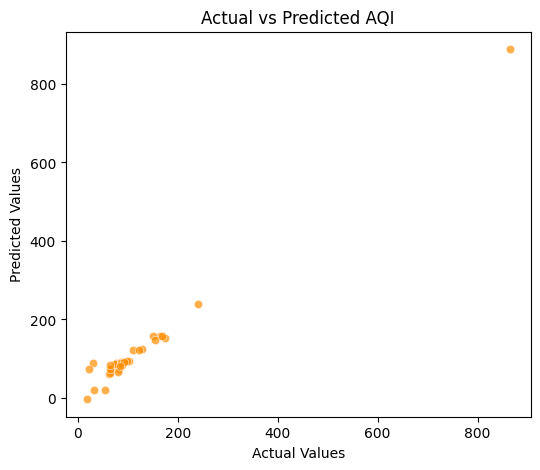


💾 Model saved as 'linear_regression_aqi.pkl'
💾 Scaler saved as 'scaler.pkl'

Example Prediction:
Input: {'PM2.5': 63.0, 'PM10': 36.0, 'O3': 16.5, 'NO2': 4.7, 'SO2': 13.4, 'CO': 4.0, 'Latitude': 22.9682591, 'Longitude': 76.064118}
Predicted AQI: 59.65


In [77]:
# ==============================
# 🌍 AIR QUALITY PREDICTION USING LINEAR REGRESSION (Excel Dataset - Fixed)
# ==============================

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import joblib

# Step 2: Load Dataset
df = pd.read_excel("/content/Dataset_AQI4-5.xlsx")  # Adjust path if needed
print("✅ Data Loaded Successfully!")
print(df.head())

# Step 3: Explore Data
print("\nData Info:")
print(df.info())

# Step 4: Identify target column automatically
target_col = None
for col in df.columns:
    if "PM2.5" in col.upper() or "AQI" in col.upper():
        target_col = col
        break

if target_col is None:
    raise ValueError("❌ No column found with 'PM2.5' or 'AQI' in its name!")

print(f"\n🎯 Target Selected: {target_col}")

# Step 5: Clean Data
df = df.dropna(subset=[target_col])  # remove rows with missing target
df = df.fillna(df.mean(numeric_only=True))  # fill numeric NaNs with mean

# Step 6: Select numeric features only
numeric_df = df.select_dtypes(include=[np.number])
if target_col not in numeric_df.columns:
    # If target got dropped, re-add it (converted to numeric if possible)
    numeric_df[target_col] = pd.to_numeric(df[target_col], errors='coerce')

# Drop rows with missing target after conversion
numeric_df = numeric_df.dropna(subset=[target_col])

# Split features and target
X = numeric_df.drop(columns=[target_col])
y = numeric_df[target_col]

print("\n✅ Numeric features selected:")
print(X.columns.tolist())

# Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 9: Train Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)
print("\n✅ Model Training Complete!")

# Step 10: Evaluate Model
y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\n📊 Model Performance:")
print(f"R² Score : {r2:.3f}")
print(f"RMSE     : {rmse:.3f}")

# Step 11: Visualize Actual vs Predicted
plt.figure(figsize=(6,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color='darkorange')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Actual vs Predicted {target_col}")
plt.show()

# Step 12: Save Model and Scaler
joblib.dump(model, "linear_regression_aqi.pkl")
joblib.dump(scaler, "scaler.pkl")
print("\n💾 Model saved as 'linear_regression_aqi.pkl'")
print("💾 Scaler saved as 'scaler.pkl'")

# Step 13: Example Prediction
sample = X_test.iloc[0:1]
scaled_sample = scaler.transform(sample)
predicted_value = model.predict(scaled_sample)[0]
print("\nExample Prediction:")
print("Input:", sample.to_dict(orient='records')[0])
print(f"Predicted {target_col}: {predicted_value:.2f}")


In [67]:
import joblib
joblib.dump(lr, "linear_regression_pm25.pkl")


['linear_regression_pm25.pkl']

In [68]:
# Load the Linear Regression model
lr_model = joblib.load("linear_regression_pm25.pkl")


In [69]:
!pip install streamlit pyngrok joblib --quiet


In [ ]:
from pyngrok import ngrok
import os
!ngrok authtoken 34ZfpjJ8DCqTLAjZDfVEytJ4e1l_5vLHTaWpjmTsit4dTfnhj

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [103]:
%%writefile app.py
import streamlit as st
import joblib
import numpy as np
import time

# -------------------------
# Load trained model and scaler
# -------------------------
lr_model = joblib.load("linear_regression_aqi.pkl")
scaler = joblib.load("scaler.pkl")

# -------------------------
# Page setup
# -------------------------
st.set_page_config(page_title=" Air Quality Prediction", layout="centered")
st.markdown("""
    <style>
        [data-testid="stAppViewContainer"] {
            background: linear-gradient(135deg, #e8f5e9 0%, #e3f2fd 100%);
            color: #1b5e20;
        }

        h1 {
            text-align: center;
            color: #1b5e20;
            font-size: 2.4em;
            font-weight: 800;
            margin-bottom: 10px;
        }

        h3 {
            font-weight: 600;
        }

        /* Input labels */
        label {
            color: #004d40 !important;
            font-weight: bold !important;
        }

        /* Buttons */
        div.stButton > button:first-child {
            background: linear-gradient(90deg, #43a047, #1b5e20);
            color: white;
            font-weight: 700;
            border-radius: 10px;
            padding: 0.6em 1.5em;
            transition: 0.3s;
        }
        div.stButton > button:hover {
            background: linear-gradient(90deg, #66bb6a, #2e7d32);
            transform: scale(1.05);
        }

        /* Result box */
        .result-box {
            background: white;
            border-radius: 15px;
            padding: 20px;
            box-shadow: 0 4px 20px rgba(0,0,0,0.1);
            text-align: center;
            margin-top: 20px;
            animation: fadeIn 1s ease-in;
        }

        /* Category colors */
        .good {color: #2e7d32;}
        .moderate {color: #fbc02d;}
        .unhealthy {color: #e53935;}
        .very-unhealthy {color: #8e24aa;}
        .hazardous {color: #6d1b1b;}

        @keyframes fadeIn {
            from {opacity: 0; transform: translateY(15px);}
            to {opacity: 1; transform: translateY(0);}
        }

        [data-testid="stExpander"] {
            background-color: #f1f8e9 !important;
            border-radius: 10px;
            border: 1px solid #a5d6a7 !important;
        }
    </style>
""", unsafe_allow_html=True)

# -------------------------
# Header
# -------------------------
st.title("🌿 Air Quality Prediction System")


# -------------------------
# User Inputs
# -------------------------
city = st.text_input("Enter City Name (e.g., Delhi, Mumbai, Chennai)")

st.subheader(" Enter Air Pollutant Levels (µg/m³)")
col1, col2, col3, col4 = st.columns(4)

with col1:
    PM10 = st.number_input(" PM10", value=80.0)
    SO2 = st.number_input("🌋 SO₂", value=10.0)
with col2:
    NO2 = st.number_input("🚗 NO₂", value=25.0)
    CO = st.number_input("🔥 CO (mg/m³)", value=1.5)
with col3:
    O3 = st.number_input("☀️ O₃", value=35.0)
    NH3 = st.number_input("🐄 NH₃", value=15.0)
with col4:
    NO3 = st.number_input("💧 NO₃", value=20.0)
    Benzene = st.number_input("🏭 Benzene", value=5.0)

# -------------------------
# AQI Category Function
# -------------------------
def pm25_to_aqi_category(pm):
    if pm <= 60:
        return "Good", "green", "😊 Excellent air quality — breathe freely!"
    elif pm <= 120:
        return "Moderate", "yellow", " Acceptable air quality — minimal risk."
    elif pm <= 180:
        return "Unhealthy for Sensitive Groups", "orange", "😷 Sensitive people may feel discomfort."
    elif pm <= 250:
        return "Unhealthy", "red", "❗ Everyone may experience some effects."
    elif pm <= 350:
        return "Very Unhealthy", "purple", "⚠️ Health warnings — limit outdoor activity!"
    else:
        return "Hazardous", "maroon", "🚨 Dangerous — stay indoors and use masks!"

# -------------------------
# Prediction
# -------------------------
if st.button(" Predict Air Quality Now!"):
    if not city.strip():
        st.error("❌ Please enter a city name.")
        st.stop()

    with st.spinner(" Analyzing your air data..."):
        time.sleep(1.5)

    features = np.array([[PM10, NO2, SO2, CO, O3, NH3, NO3, Benzene]])
    scaled_features = scaler.transform(features)
    prediction = lr_model.predict(scaled_features)[0]
    category, color, desc = pm25_to_aqi_category(prediction)

    # Step-by-step reveal
    with st.container():
      st.markdown(f"""
    <div class='result-box'>
        <h3> City: <b>{city.title()}</b></h3>
        <h3 style="color: {color};">AQI Category: {category}</h3>
        <p>{desc}</p>
    </div>
""", unsafe_allow_html=True)


# -------------------------
# Info Section
# -------------------------
with st.expander("📘 Learn About Each Pollutant"):
    st.markdown("""
-  **PM10:** Dust, smoke, and tiny solid particles
- 🚗 **NO₂:** Vehicle exhaust gas, affects lungs
- 🌋 **SO₂:** From coal or oil burning
- 🔥 **CO:** Gas from incomplete combustion
- ☀️ **O₃:** Ground-level ozone from sunlight reactions
- 🐄 **NH₃:** Ammonia from fertilizers and animal waste
- 💧 **NO₃:** Nitrates from chemical reactions in the air
- 🏭 **Benzene:** Industrial and fuel-related emission
    """)


Overwriting app.py


In [82]:
!pip install streamlit pyngrok joblib --quiet

# Kill any previous tunnels
from pyngrok import ngrok
ngrok.kill()

# Start Streamlit in background
get_ipython().system_raw(
    'streamlit run /content/app.py --server.port 8502 --server.headless true &'
)

import time
time.sleep(5)  # give Streamlit some time to start

# Connect ngrok
public_url = ngrok.connect(8502)
print("🌐 Your live app URL:", public_url)


🌐 Your live app URL: NgrokTunnel: "https://cletus-pielike-preconfinedly.ngrok-free.dev" -> "http://localhost:8502"
